In [74]:
# https://t.me/heroesofZ

from bs4 import BeautifulSoup
import pandas as pd
import json
from pprint import pprint


In [75]:
file_path = "/Users/Oksana/Downloads/Telegram Desktop/ChatExport_2024-06-01/result.json"

# Open the file and load the data
with open(file_path, "r") as file:
    data = json.load(file)

pprint(data)

{'id': 1547226852,
 'messages': [{'action': 'create_channel',
               'actor': '–ì–µ—Ä–æ–∏ —Å–ø–µ—Ü–æ–ø–µ—Ä–∞—Ü–∏–∏ Z',
               'actor_id': 'channel1547226852',
               'date': '2022-06-27T10:58:32',
               'date_unixtime': '1656320312',
               'id': 1,
               'text': '',
               'text_entities': [],
               'title': '–ì–µ—Ä–æ–∏ —Å–ø–µ—Ü–æ–ø–µ—Ä–∞—Ü–∏–∏ Z',
               'type': 'service'},
              {'date': '2022-06-29T08:55:00',
               'date_unixtime': '1656485700',
               'edited': '2022-06-29T08:58:55',
               'edited_unixtime': '1656485935',
               'from': '–ì–µ—Ä–æ–∏ —Å–ø–µ—Ü–æ–ø–µ—Ä–∞—Ü–∏–∏ Z',
               'from_id': 'channel1547226852',
               'id': 3,
               'text': ['–î–æ–±—Ä–æ –ø–æ–∂–∞–ª–æ–≤–∞—Ç—å –Ω–∞ –∫–∞–Ω–∞–ª ¬´',
                        {'href': 'https://t.me/heroesofZ',
                         'text': '–ì–µ—Ä–æ–∏ —Å–ø–µ—Ü–æ–ø–µ—Ä–∞—Ü–∏–∏ Z',
            

In [76]:
# build a dataframe and unnest the json 'messages' column
df = pd.json_normalize(data, record_path =['messages'])

# ignore the first row
df = df.iloc[1:]
display(df.head(3))

id     type                 date date_unixtime actor actor_id action title  \
1   3  message  2022-06-29T08:55:00    1656485700   NaN      NaN    NaN   NaN   
2   4  message  2022-06-29T09:00:51    1656486051   NaN      NaN    NaN   NaN   
3   5  message  2022-06-30T09:00:41    1656572441   NaN      NaN    NaN   NaN   

                                                text  \
1  [–î–æ–±—Ä–æ –ø–æ–∂–∞–ª–æ–≤–∞—Ç—å –Ω–∞ –∫–∞–Ω–∞–ª ¬´, {'type': 'text_l...   
2  [¬´–†–∞–±–æ—Ç–∞–µ–º –æ—Ç –¥—É—à–∏!¬ª, ‚Äî —Ç–∞–∫ –≥–æ–≤–æ—Ä–∏—Ç –∫–æ–º–∞–Ω–¥–∏—Ä –∞...   
3  [–ê–ª–µ–∫—Å–∞–Ω–¥—Ä –û–ª–µ–π–Ω–∏–∫ –±—ã–ª –µ—â–µ –º–∞–ª—å—á–∏—à–∫–æ–π, –∫–æ–≥–¥–∞ –Ω...   

                                       text_entities  ...     file_name  \
1  [{'type': 'plain', 'text': '–î–æ–±—Ä–æ –ø–æ–∂–∞–ª–æ–≤–∞—Ç—å –Ω...  ...           NaN   
2  [{'type': 'plain', 'text': '¬´–†–∞–±–æ—Ç–∞–µ–º –æ—Ç –¥—É—à–∏!...  ...  IMG_8794.MP4   
3  [{'type': 'plain', 'text': '–ê–ª–µ–∫—Å–∞–Ω–¥—Ä –û–ª–µ–π–Ω–∏–∫ ...  ...  IMG_8807.MP4   

                                           thumbnail  media_type  mime_type  \
1                                                NaN         NaN        NaN   
2  (File not included. Change data exporting sett...  video_file  video/mp4   
3  (File not included. Change data exporting sett...  video_file  video/mp4   

  duration_seconds  width height photo forwarded_from  reply_to_message_id  
1              NaN    NaN    NaN   NaN            NaN                  NaN  
2            115.0  480.0  480.0   NaN            NaN                  NaN  
3            164.0  848.0  848.0   NaN            NaN                  NaN  

[3 rows x 25 columns]

In [79]:
# split time_tt to date and time
df['date'] = df['date'].str.split(' ').str[0]
df['time'] = df['date'].str.split(' ').str[1]

# # Extract both month and year into one column
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df['month_year'] = df['month_year'].astype(str)
display(df.head(3))

id     type                 date date_unixtime actor actor_id action title  \
1   3  message  2022-06-29T08:55:00    1656485700   NaN      NaN    NaN   NaN   
2   4  message  2022-06-29T09:00:51    1656486051   NaN      NaN    NaN   NaN   
3   5  message  2022-06-30T09:00:41    1656572441   NaN      NaN    NaN   NaN   

                                                text  \
1  [–î–æ–±—Ä–æ –ø–æ–∂–∞–ª–æ–≤–∞—Ç—å –Ω–∞ –∫–∞–Ω–∞–ª ¬´, {'type': 'text_l...   
2  [¬´–†–∞–±–æ—Ç–∞–µ–º –æ—Ç –¥—É—à–∏!¬ª, ‚Äî —Ç–∞–∫ –≥–æ–≤–æ—Ä–∏—Ç –∫–æ–º–∞–Ω–¥–∏—Ä –∞...   
3  [–ê–ª–µ–∫—Å–∞–Ω–¥—Ä –û–ª–µ–π–Ω–∏–∫ –±—ã–ª –µ—â–µ –º–∞–ª—å—á–∏—à–∫–æ–π, –∫–æ–≥–¥–∞ –Ω...   

                                       text_entities  ...  media_type  \
1  [{'type': 'plain', 'text': '–î–æ–±—Ä–æ –ø–æ–∂–∞–ª–æ–≤–∞—Ç—å –Ω...  ...         NaN   
2  [{'type': 'plain', 'text': '¬´–†–∞–±–æ—Ç–∞–µ–º –æ—Ç –¥—É—à–∏!...  ...  video_file   
3  [{'type': 'plain', 'text': '–ê–ª–µ–∫—Å–∞–Ω–¥—Ä –û–ª–µ–π–Ω–∏–∫ ...  ...  video_file   

   mime_type duration_seconds  width height photo forwarded_from  \
1        NaN              NaN    NaN    NaN   NaN            NaN   
2  video/mp4            115.0  480.0  480.0   NaN            NaN   
3  video/mp4            164.0  848.0  848.0   NaN            NaN   

  reply_to_message_id time  month_year  
1                 NaN  NaN     2022-06  
2                 NaN  NaN     2022-06  
3                 NaN  NaN     2022-06  

[3 rows x 27 columns]

In [82]:
# Function to extract plain text
def extract_plain_text(row):
    return ''.join([item if isinstance(item, str) else item['text'] for item in row])

# Apply function to DataFrame
df['plain_text'] = df['text'].apply(extract_plain_text)

In [83]:
df.head(5)

id     type                 date date_unixtime actor actor_id action title  \
1   3  message  2022-06-29T08:55:00    1656485700   NaN      NaN    NaN   NaN   
2   4  message  2022-06-29T09:00:51    1656486051   NaN      NaN    NaN   NaN   
3   5  message  2022-06-30T09:00:41    1656572441   NaN      NaN    NaN   NaN   
4   6  message  2022-07-01T09:00:45    1656658845   NaN      NaN    NaN   NaN   
5   7  message  2022-07-02T09:01:12    1656745272   NaN      NaN    NaN   NaN   

                                                text  \
1  [–î–æ–±—Ä–æ –ø–æ–∂–∞–ª–æ–≤–∞—Ç—å –Ω–∞ –∫–∞–Ω–∞–ª ¬´, {'type': 'text_l...   
2  [¬´–†–∞–±–æ—Ç–∞–µ–º –æ—Ç –¥—É—à–∏!¬ª, ‚Äî —Ç–∞–∫ –≥–æ–≤–æ—Ä–∏—Ç –∫–æ–º–∞–Ω–¥–∏—Ä –∞...   
3  [–ê–ª–µ–∫—Å–∞–Ω–¥—Ä –û–ª–µ–π–Ω–∏–∫ –±—ã–ª –µ—â–µ –º–∞–ª—å—á–∏—à–∫–æ–π, –∫–æ–≥–¥–∞ –Ω...   
4  [–ë—ã—Ç—å –æ—Ñ–∏—Ü–µ—Ä–æ–º ‚Äî –∑–Ω–∞—á–∏—Ç –Ω–µ—Å—Ç–∏ –æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç—å ...   
5  [¬´–ö—Ç–æ —Å–º–µ–ª ‚Äî —Ç–æ—Ç —Ü–µ–ª¬ª. –¢–∞–∫ —Å–∫–∞–∑–∞–ª –æ–¥–Ω–∞–∂–¥—ã –ê–ª–µ–∫...   

                                       text_entities  ...  mime_type  \
1  [{'type': 'plain', 'text': '–î–æ–±—Ä–æ –ø–æ–∂–∞–ª–æ–≤–∞—Ç—å –Ω...  ...        NaN   
2  [{'type': 'plain', 'text': '¬´–†–∞–±–æ—Ç–∞–µ–º –æ—Ç –¥—É—à–∏!...  ...  video/mp4   
3  [{'type': 'plain', 'text': '–ê–ª–µ–∫—Å–∞–Ω–¥—Ä –û–ª–µ–π–Ω–∏–∫ ...  ...  video/mp4   
4  [{'type': 'plain', 'text': '–ë—ã—Ç—å –æ—Ñ–∏—Ü–µ—Ä–æ–º ‚Äî –∑–Ω...  ...  video/mp4   
5  [{'type': 'plain', 'text': '¬´–ö—Ç–æ —Å–º–µ–ª ‚Äî —Ç–æ—Ç —Ü–µ...  ...  video/mp4   

  duration_seconds  width height photo forwarded_from reply_to_message_id  \
1              NaN    NaN    NaN   NaN            NaN                 NaN   
2            115.0  480.0  480.0   NaN            NaN                 NaN   
3            164.0  848.0  848.0   NaN            NaN                 NaN   
4             80.0  848.0  848.0   NaN            NaN                 NaN   
5             58.0  640.0  640.0   NaN            NaN                 NaN   

  time month_year                                         plain_text  
1  NaN    2022-06  –î–æ–±—Ä–æ –ø–æ–∂–∞–ª–æ–≤–∞—Ç—å –Ω–∞ –∫–∞–Ω–∞–ª ¬´–ì–µ—Ä–æ–∏ —Å–ø–µ—Ü–æ–ø–µ—Ä–∞—Ü–∏–∏ ...  
2  NaN    2022-06  ¬´–†–∞–±–æ—Ç–∞–µ–º –æ—Ç –¥—É—à–∏!¬ª, ‚Äî —Ç–∞–∫ –≥–æ–≤–æ—Ä–∏—Ç –∫–æ–º–∞–Ω–¥–∏—Ä –∞—ç...  
3  NaN    2022-06  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä –û–ª–µ–π–Ω–∏–∫ –±—ã–ª –µ—â–µ –º–∞–ª—å—á–∏—à–∫–æ–π, –∫–æ–≥–¥–∞ –Ω–∞...  
4  NaN    2022-07  –ë—ã—Ç—å –æ—Ñ–∏—Ü–µ—Ä–æ–º ‚Äî –∑–Ω–∞—á–∏—Ç –Ω–µ—Å—Ç–∏ –æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç—å –∑...  
5  NaN    2022-07  ¬´–ö—Ç–æ —Å–º–µ–ª ‚Äî —Ç–æ—Ç —Ü–µ–ª¬ª. –¢–∞–∫ —Å–∫–∞–∑–∞–ª –æ–¥–Ω–∞–∂–¥—ã –ê–ª–µ–∫—Å...  

[5 rows x 28 columns]

<AxesSubplot:title={'center':'Number of text and media messages per month'}, xlabel='month_year'>

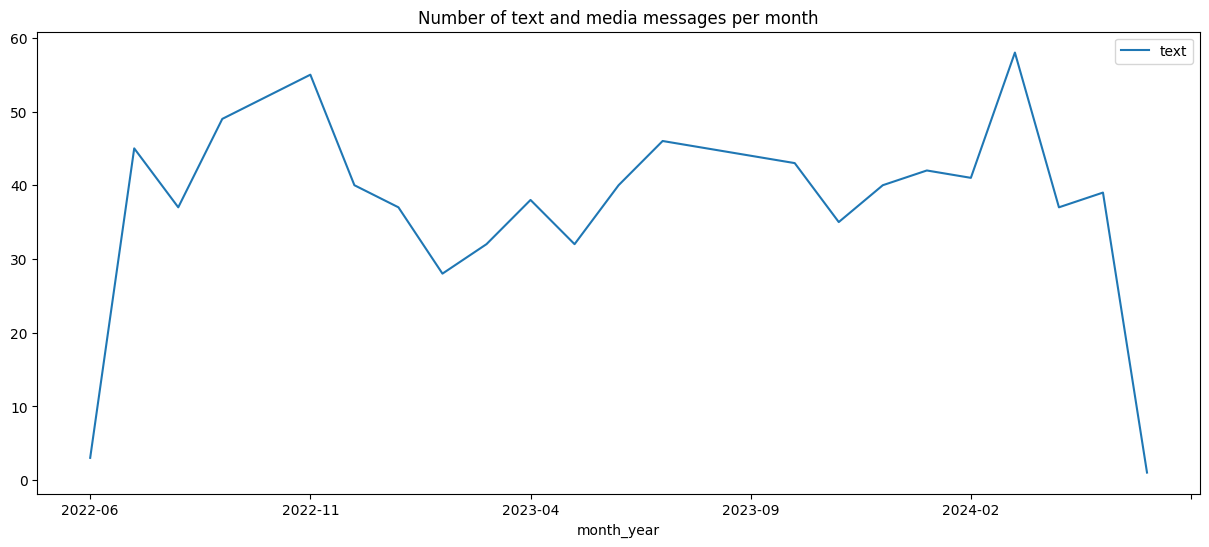

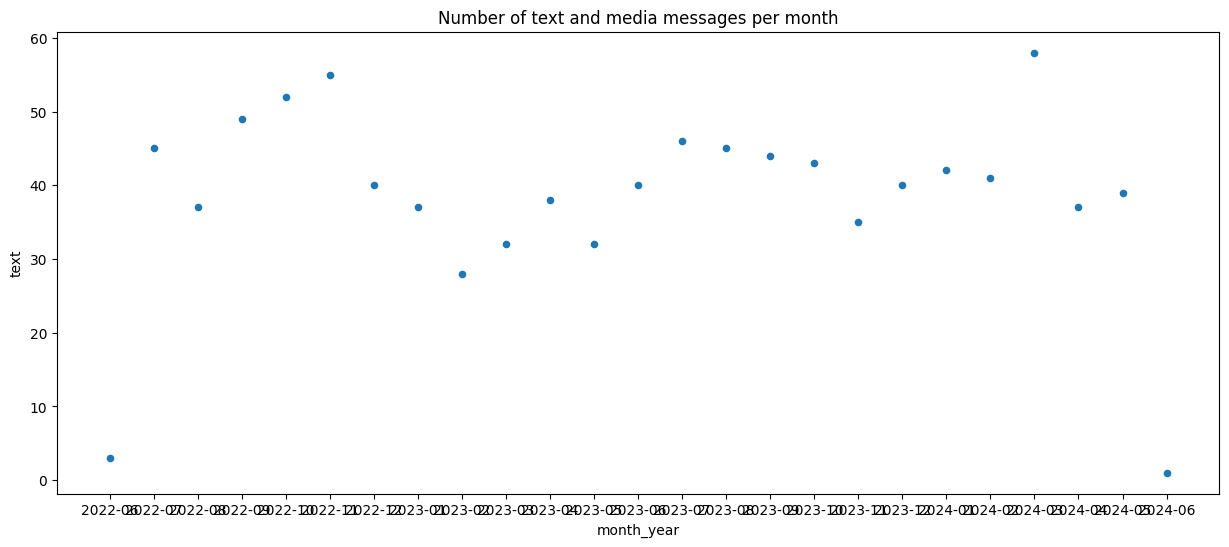

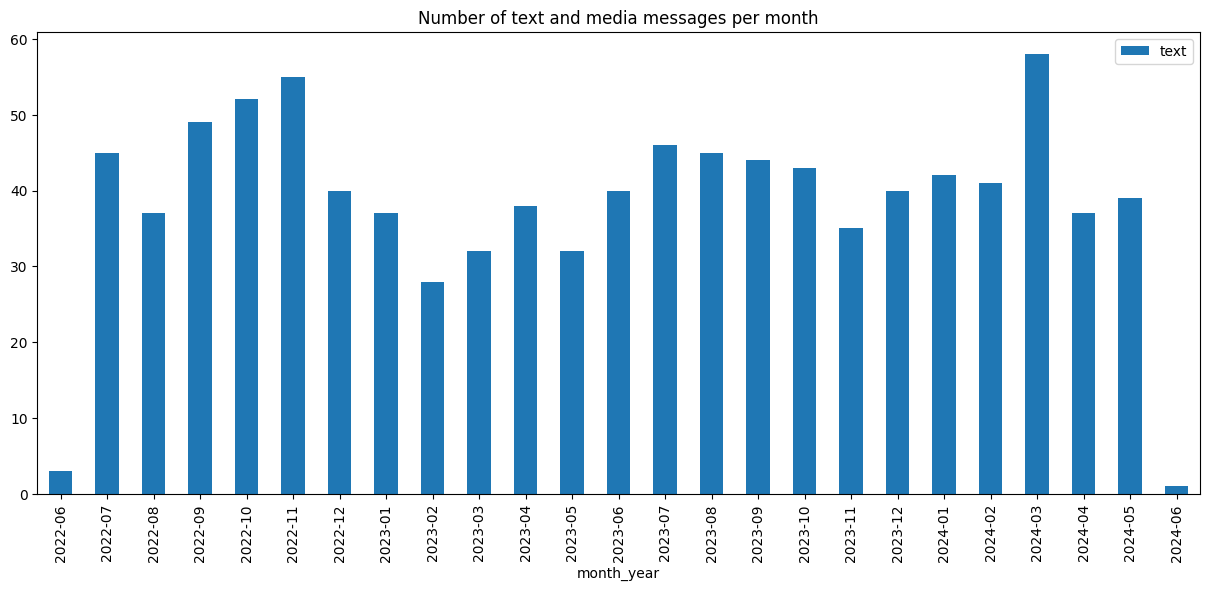

In [38]:
### TEXT + MEDIA in Messages ###

# group by month and year and count number of posts
df_count_text = df.groupby('month_year')['text'].count()
df_count_text = df_count_text.reset_index()

# create a line plot, where x-axis is the month and year and y-axis is the number of messages
df_count_text.plot.line(x='month_year', y='text', figsize=(15, 6), title='Number of text and media messages per month')

# plot with dots
df_count_text.plot(x='month_year', y='text', kind='scatter', figsize=(15, 6), title='Number of text and media messages per month')

# bar chart
df_count_text.plot.bar(x='month_year', y='text', figsize=(15, 6), title='Number of text and media messages per month')


In [119]:

import re
## Extract names from text 
df_ru_names = pd.read_csv('/Users/Oksana/Documents/ALEPH/RU/ru_tg_channels/telegram-api/ru_names.csv')       
names_list_male = df_ru_names['ru_male_name'].tolist()
names_list_female = df_ru_names['ru_female_name'].tolist()
names_list = names_list_male + names_list_female
print(names_list)
type(names_list)
# remove None values
names_list = [x for x in names_list if str(x) != 'nan']
#names_list = [x for x in names_list if str(x) != 'None']

['–ê–ª–µ–∫—Å–∞–Ω–¥—Ä', '–ê–Ω–¥—Ä–µ–π', '–î–º–∏—Ç—Ä–∏–π', '–ò–≤–∞–Ω', '–°–µ—Ä–≥–µ–π', '–í–ª–∞–¥–∏–º–∏—Ä', '–ù–∏–∫–æ–ª–∞–π', '–ü–∞–≤–µ–ª', '–ê–ª–µ–∫—Å–µ–π', '–ú–∏—Ö–∞–∏–ª', '–ï–≤–≥–µ–Ω–∏–π', '–í–∞—Å–∏–ª–∏–π', '–í–∏–∫—Ç–æ—Ä', '–ê–Ω–∞—Ç–æ–ª–∏–π', '–Æ—Ä–∏–π', '–û–ª–µ–≥', '–í–∞–ª–µ—Ä–∏–π', '–ö–æ–Ω—Å—Ç–∞–Ω—Ç–∏–Ω', '–ë–æ—Ä–∏—Å', '–í—è—á–µ—Å–ª–∞–≤', '–ì—Ä–∏–≥–æ—Ä–∏–π', '–ê—Ä—Ç–µ–º', '–î–µ–Ω–∏—Å', '–ò–≥–æ—Ä—å', '–†–æ–º–∞–Ω', '–í–ª–∞–¥–∏—Å–ª–∞–≤', '–ê–Ω—Ç–æ–Ω', '–¢–∏–º–æ—Ñ–µ–π', '–ü–µ—Ç—Ä', '–ì–µ–Ω–Ω–∞–¥–∏–π', '–ù–∏–∫–∏—Ç–∞', '–°—Ç–∞–Ω–∏—Å–ª–∞–≤', '–î–∞–Ω–∏–∏–ª', '–§–µ–¥–æ—Ä', '–õ–µ–æ–Ω–∏–¥', '–ê–Ω–¥—Ä–µ–µ–≤–∏—á', '–í–∞–ª–µ–Ω—Ç–∏–Ω', '–ú–∞–∫—Å–∏–º', '–°–µ–º–µ–Ω', '–ú–∞—Ç–≤–µ–π', '–ì–µ–æ—Ä–≥–∏–π', '–ò–ª—å—è', '–ê—Ä–∫–∞–¥–∏–π', '–Ø—Ä–æ—Å–ª–∞–≤', '–ê–ª–µ–∫—Å–∞–Ω–¥—Ä–æ', '–ï–≥–æ—Ä', '–ö–∏—Ä–∏–ª–ª', '–í–ª–∞–¥', '–°–∞–≤–µ–ª–∏–π', '–ï—Ñ–∏–º', '–ñ–µ–Ω—è', '–ú–∞—Ä–∫', '–í–∏—Ç–∞–ª–∏–π', '–ê–ª–µ–∫—Å–µ–µ–≤–∏—á', '–§–∏–ª–∏–ø–ø', '–°—Ç–µ–ø–∞–Ω', '–ú–∞–∫–∞—Ä', '–ì–ª–µ–±', '–õ–µ–≤', '–í–∞–¥–∏–º', '–ü–ª–∞—Ç–æ–Ω',

In [126]:
### FIND MALE AND FEMALE NAMES IN TEXT ###

import re
## Extract names from text 
df_ru_names = pd.read_csv('/Users/Oksana/Documents/ALEPH/RU/ru_tg_channels/telegram-api/ru_names.csv')       
names_list_male = df_ru_names['ru_male_name'].tolist()
names_list_female = df_ru_names['ru_female_name'].tolist()
# remove None values
names_list_female = [x for x in names_list_female if str(x) != 'nan']
names_list = names_list_male + names_list_female

# Function to find names and surnames in text

def find_names(text, names_list):
    found_names = []
    for name in names_list:
        # Regex to find name possibly followed by a surname
        """
        not extracting a surname before a name, improve in the future
        """
        #pattern = r'\b' + re.escape(name) + r'\s+[–ê-–Ø][–∞-—è]+' 
        #pattern = rf'\b{name}\b(?:\s+[–ê-–Ø][–∞-—è]+)?'
        #pattern = rf'\b{name}\s+[–ê-–Ø][–∞-—è]+'
        #pattern = rf'\b{name[:-1]}[–∞-—è—ë]*\s+[–ê-–Ø–Å][–∞-—è—ë]+\b' # name + surname, helps with names with different endings
        #pattern = rf'\b{name[:-1]}[–∞-—è—ë]*\s+[–ê-–Ø–Å][–∞-—è—ë]+\b'
        pattern = rf'\b{name[:-1]}[–∞-—è—ë]*\s+[–ê-–Ø–Å][–∞-—è—ë]+\b'
        matches = re.findall(pattern, text)

        found_names.extend(matches)
    return found_names

# Apply the function to each row in df['text']
df['plain_text'] = df['plain_text'].fillna('')

df['extracted_names'] = df['plain_text'].apply(lambda x: find_names(x, names_list))

# Display the result
display(df.head(2))

df.to_csv('extracted_names_heroesOfZ_v6.csv', index=False)


id     type                 date date_unixtime actor actor_id action title  \
1   3  message  2022-06-29T08:55:00    1656485700   NaN      NaN    NaN   NaN   
2   4  message  2022-06-29T09:00:51    1656486051   NaN      NaN    NaN   NaN   

                                                text  \
1  [–î–æ–±—Ä–æ –ø–æ–∂–∞–ª–æ–≤–∞—Ç—å –Ω–∞ –∫–∞–Ω–∞–ª ¬´, {'type': 'text_l...   
2  [¬´–†–∞–±–æ—Ç–∞–µ–º –æ—Ç –¥—É—à–∏!¬ª, ‚Äî —Ç–∞–∫ –≥–æ–≤–æ—Ä–∏—Ç –∫–æ–º–∞–Ω–¥–∏—Ä –∞...   

                                       text_entities  ...  width height photo  \
1  [{'type': 'plain', 'text': '–î–æ–±—Ä–æ –ø–æ–∂–∞–ª–æ–≤–∞—Ç—å –Ω...  ...    NaN    NaN   NaN   
2  [{'type': 'plain', 'text': '¬´–†–∞–±–æ—Ç–∞–µ–º –æ—Ç –¥—É—à–∏!...  ...  480.0  480.0   NaN   

  forwarded_from reply_to_message_id time month_year  \
1            NaN                 NaN  NaN    2022-06   
2            NaN                 NaN  NaN    2022-06   

                                          plain_text extracted_names  \
1  –î–æ–±—Ä–æ –ø–æ–∂–∞–ª–æ–≤–∞—Ç—å –Ω–∞ –∫–∞–Ω–∞–ª ¬´–ì–µ—Ä–æ–∏ —Å–ø–µ—Ü–æ–ø–µ—Ä–∞—Ü–∏–∏ ...              []   
2  ¬´–†–∞–±–æ—Ç–∞–µ–º –æ—Ç –¥—É—à–∏!¬ª, ‚Äî —Ç–∞–∫ –≥–æ–≤–æ—Ä–∏—Ç –∫–æ–º–∞–Ω–¥–∏—Ä –∞—ç...   [–Æ—Ä–∏–π –ë—Ä–æ–≤–∫–æ]   

   extracted_names_extended  
1                        []  
2                        []  

[2 rows x 30 columns]

In [114]:
import re

def find_ranked_names(text):
    found_ranked_names = []
    # Define common ranks in genitive case
    ranks = [
        '–∫–∞–ø–∏—Ç–∞–Ω–∞', '–ø–æ–¥–ø–æ–ª–∫–æ–≤–Ω–∏–∫–∞', '–ª–µ–π—Ç–µ–Ω–∞–Ω—Ç–∞', '–º–∞–π–æ—Ä–∞', '–ø–æ–ª–∫–æ–≤–Ω–∏–∫–∞', '–≥–µ–Ω–µ—Ä–∞–ª–∞',
        '—Å—Ç–∞—Ä—à–µ–≥–æ –ª–µ–π—Ç–µ–Ω–∞–Ω—Ç–∞', '–º–ª–∞–¥—à–µ–≥–æ –ª–µ–π—Ç–µ–Ω–∞–Ω—Ç–∞', '—Å—Ç–∞—Ä—à–∏–Ω—ã', '—Å–µ—Ä–∂–∞–Ω—Ç–∞'
    ]
    
    for rank in ranks:
        # Regex to find rank followed by a surname
        pattern = rf'\b{rank}\s+[–ê-–Ø–Å][–∞-—è—ë]+(?:–æ–≤–∞|–µ–≤–∞|–∏–Ω–∞|—Å–∫–∞—è|–∏–π|–æ–≤|–µ–≤|–∏–Ω|—Å–∫–∏–π)\b'
        matches = re.findall(pattern, text)
        found_ranked_names.extend(matches)
    return found_ranked_names

df['extracted_names_extended'] = df['plain_text'].apply(lambda x: find_ranked_names(x))



In [ ]:
# Combine extracted names with extracted names_extended
df['extracted_names'] = df.apply(lambda row: row['extracted_names_extended'] if len(row['extracted_names']) == 0 else row['extracted_names'], axis=1)
